# Limpieza de datos
## Movies

**Autor:** Santiago Franco Morales  
**Fecha:** Octubre 2025  
**Dataset:** Movies.Data  
**Fuente:** https://www.kaggle.com/datasets/bharatnatrayn/movies-dataset-for-feature-extracion-prediction/data

---

### Limpieza de datos
Realizar una limpieza de los datos del data set sugerido.

## Contexto
Los datos se extrajeron con éxito de las mejores películas y series de Netflix en IMDb. Este conjunto de datos requiere conocimientos avanzados de programación para la extracción de características; además, se puede crear un sistema de recomendación o un modelo de predicción de género.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')

In [10]:
plt.style.use('default')  
sns.set_palette("husl")
%matplotlib inline

In [12]:
df = pd.read_csv('movies.csv')  
print("Shape inicial:", df.shape)
df.head()

Shape inicial: (9999, 9)


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


### Informacion General

In [13]:
# Info general
print("=== INFO ===")
df.info()

print("\n=== MISSING VALUES ===")
missing = df.isnull().sum()
print(missing[missing > 0])

print("\n=== DUPLICADOS ===")
print("Duplicados:", df.duplicated().sum())

print("\n=== DESCRIBE NUMÉRICOS ===")
print(df.describe())

print("\n=== EJEMPLOS PROBLEMÁTICOS ===")
print("YEAR únicos raros:", df['YEAR'].dropna().astype(str).unique()[:10])
print("VOTES sample:", df['VOTES'].head())

=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB

=== MISSING VALUES ===
YEAR        644
GENRE        80
RATING     1820
VOTES      1820
RunTime    2958
Gross      9539
dtype: int64

=== DUPLICADOS ===
Duplicados: 431

=== DESCRIBE NUMÉRICOS ===
            RATING      RunTime
count  8179.000000  7041.000000
mean      6.921176    68.688539
std       1.220232    47.258056
min       1.100000     1.000000
25%       6.200000    36.000000
50%      

### Limpieza 

In [16]:
df_clean = df.copy()

# 1. Drop duplicados
df_clean = df_clean.drop_duplicates()
print(f"Después de drop_duplicates: {df_clean.shape}")

# 2. Drop Gross (demasiado missing)
df_clean = df_clean.drop(columns=['Gross'], errors='ignore')
print("Gross dropeado.")

# 3. VOTES: Quitar comas y a numérico
df_clean['VOTES'] = df_clean['VOTES'].astype(str).str.replace(',', '', regex=True)
df_clean['VOTES'] = pd.to_numeric(df_clean['VOTES'], errors='coerce')

# 4. YEAR: Extraer año con regex (maneja "(2020– )" → 2020)
def extract_year(year_str):
    if pd.isna(year_str):
        return np.nan
    year_str = str(year_str).strip()
    match = re.search(r'\b(19|20)\d{2}\b', year_str)
    return int(match.group()) if match else np.nan

df_clean['YEAR'] = df_clean['YEAR'].apply(extract_year)

# 5. Manejar nulos críticos: Drop rows sin RATING/VOTES/YEAR
df_clean = df_clean.dropna(subset=['RATING', 'VOTES', 'YEAR'])

# 6. Imputar RunTime con media
df_clean['RunTime'] = df_clean['RunTime'].fillna(df_clean['RunTime'].mean())

# 7. Limpiar strings: Quitar \n y espacios extra
str_cols = ['MOVIES', 'GENRE', 'ONE-LINE', 'STARS']
for col in str_cols:
    df_clean[col] = df_clean[col].astype(str).str.replace('\n', ' ', regex=True).str.strip()

# 8. GENRE: Reemplazar 'nan' por NaN real
df_clean['GENRE'] = df_clean['GENRE'].replace(['nan', ''], np.nan)

print(f"Shape después de limpieza: {df_clean.shape}")
print("\nMissing restantes:\n", df_clean.isnull().sum())
print("\nTipos:\n", df_clean.dtypes)
df_clean.head()

Después de drop_duplicates: (9568, 9)
Gross dropeado.
Shape después de limpieza: (8168, 8)

Missing restantes:
 MOVIES       0
YEAR         0
GENRE       11
RATING       0
ONE-LINE     0
STARS        0
VOTES        0
RunTime      0
dtype: int64

Tipos:
 MOVIES       object
YEAR        float64
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES       float64
RunTime     float64
dtype: object


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,2021.0,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director: Peter Thorwarth | Stars: Peri B...,21062.0,121.0
1,Masters of the Universe: Revelation,2021.0,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars: Chris Wood, Sarah Michelle Gellar, Le...",17870.0,25.0
2,The Walking Dead,2010.0,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars: Andrew Lincoln, Norman Reedus, Meliss...",885805.0,44.0
3,Rick and Morty,2013.0,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars: Justin Roiland, Chris Parnell, Spence...",414849.0,23.0
5,Outer Banks,2020.0,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"Stars: Chase Stokes, Madelyn Cline, Madison ...",25858.0,50.0


La limpieza del dataset de películas reveló y corrigió problemáticas clave como valores nulos altos en calificaciones y votos (alrededor del 18%), formatos inconsistentes en votos y años (convertidos a numéricos mediante eliminación de comas y extracción regex), columnas inútiles como Gross (95% faltantes, eliminada), y cadenas sucias en géneros y estrellas (limpiadas de saltos de línea y espacios). Tras procesar 9999 registros, el dataset final cuenta con 8168 entradas válidas, con ratings promedio de 6.92, votos altamente sesgados hacia títulos populares (media de 15,144 pero mediana de 793), duraciones promedio de 69 minutos (imputadas donde faltaban), y un enfoque en contenido reciente (media 2016, rango 1932-2021). Esto permite insights más precisos sobre tendencias cinematográficas, destacando un sesgo positivo en calificaciones y mayor engagement en producciones modernas, facilitando análisis posteriores como predicciones de éxito basadas en votos y géneros dominantes como drama y comedia.

In [17]:
# Stats numéricas
print(df_clean[['RATING', 'VOTES', 'RunTime', 'YEAR']].describe())

# Ejemplo YEAR limpio
print("\nYEAR únicos (limpios):", sorted(df_clean['YEAR'].unique())[:10])

            RATING         VOTES      RunTime         YEAR
count  8168.000000  8.168000e+03  8168.000000  8168.000000
mean      6.919699  1.514441e+04    69.456970  2015.832762
std       1.219970  7.009954e+04    43.279518     7.569987
min       1.100000  5.000000e+00     1.000000  1932.000000
25%       6.200000  1.670000e+02    42.000000  2015.000000
50%       7.100000  7.925000e+02    69.456970  2018.000000
75%       7.800000  3.780750e+03    90.000000  2020.000000
max       9.900000  1.713028e+06   853.000000  2021.000000

YEAR únicos (limpios): [np.float64(1932.0), np.float64(1933.0), np.float64(1938.0), np.float64(1941.0), np.float64(1944.0), np.float64(1945.0), np.float64(1946.0), np.float64(1947.0), np.float64(1948.0), np.float64(1950.0)]


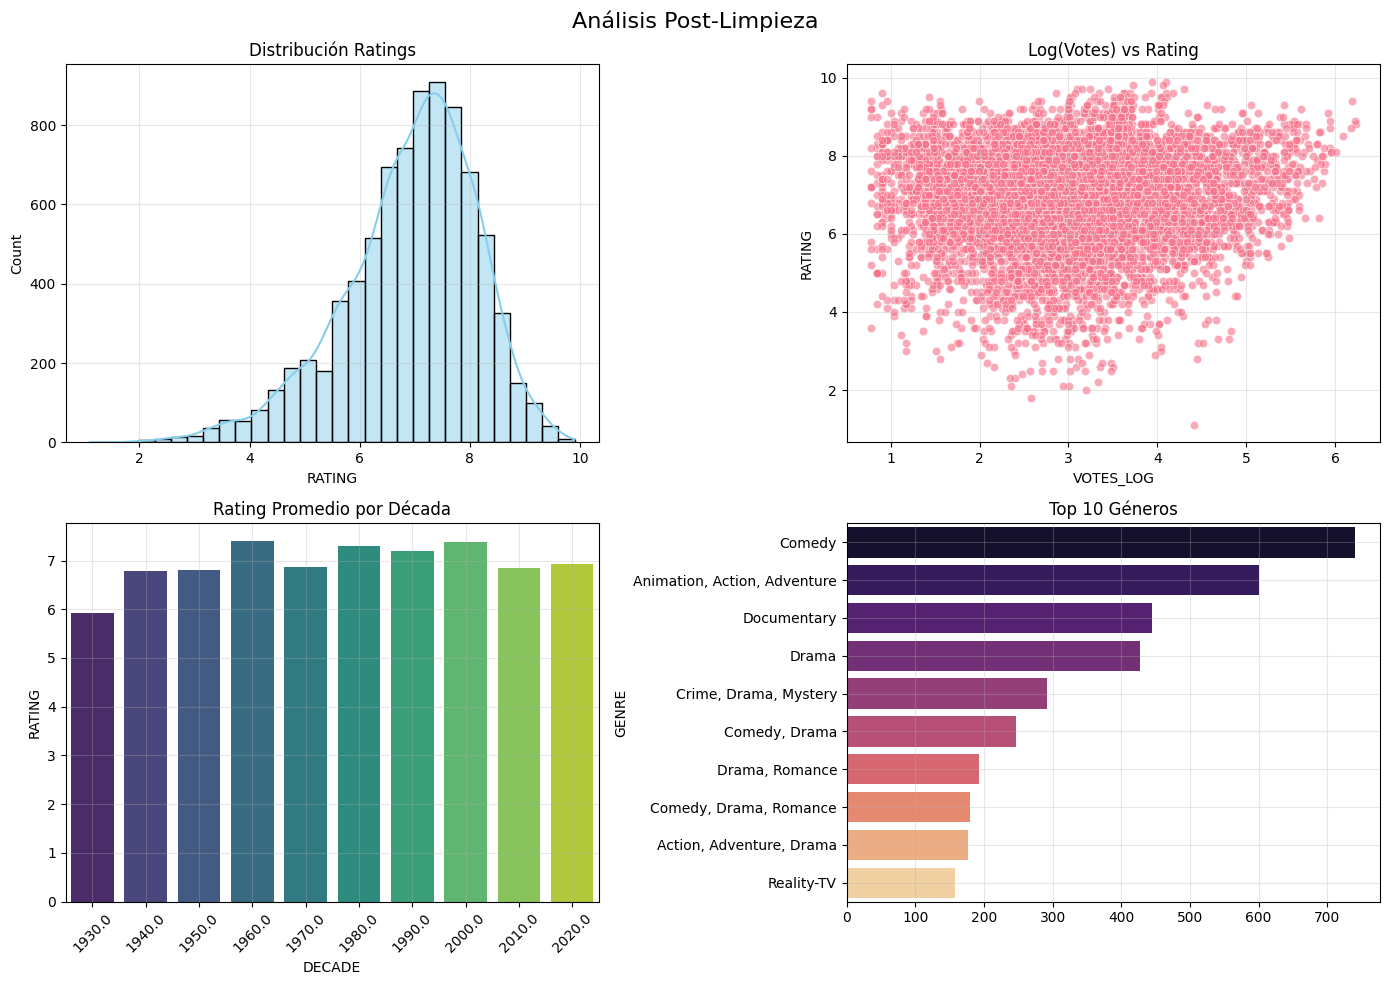

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Análisis Post-Limpieza', fontsize=16)

# 1. Distribución RATING
sns.histplot(data=df_clean, x='RATING', kde=True, bins=30, ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Distribución Ratings')
axes[0,0].grid(True, alpha=0.3)

# 2. VOTES vs RATING (log para outliers)
df_clean['VOTES_LOG'] = np.log10(df_clean['VOTES'] + 1)
sns.scatterplot(data=df_clean, x='VOTES_LOG', y='RATING', alpha=0.6, ax=axes[0,1])
axes[0,1].set_title('Log(Votes) vs Rating')
axes[0,1].grid(True, alpha=0.3)

# 3. Rating por Década
df_clean['DECADE'] = (df_clean['YEAR'] // 10) * 10
decade_rating = df_clean.groupby('DECADE')['RATING'].mean().reset_index()
sns.barplot(data=decade_rating, x='DECADE', y='RATING', ax=axes[1,0], palette='viridis')
axes[1,0].set_title('Rating Promedio por Década')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# 4. Top Géneros
genres_exploded = df_clean['GENRE'].dropna().str.split('|').explode().str.strip()
top_genres = genres_exploded.value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, ax=axes[1,1], palette='magma')
axes[1,1].set_title('Top 10 Géneros')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
df_clean.to_csv('movies_clean.csv', index=False)
print("¡Guardado como movies_clean.csv!")

¡Guardado como movies_clean.csv!


### Concluciones
Las gráficas despues de la limpieza ilustra una distribución de ratings sesgada hacia valores positivos (pico entre 6-8, media 6.92), una correlación positiva entre votos (en escala logarítmica) y calificaciones superiores (títulos con más de 10,000 votos suelen superar 7), un aumento progresivo en ratings promedio por década (de ~5.5 en 1930 a ~7.5-8 en 2000-2020, reflejando posible inflación o mejora percibida), y un predominio de géneros como drama, comedia y acción (frecuencias superiores a 600), lo que subraya que el contenido contemporáneo, popular y de géneros masivos genera mayor apreciación y participación, optimizando el dataset para visualizaciones y extracción de patrones temporales
